<a href="https://colab.research.google.com/github/anshumankhunteta/calories_burnt_predict-ml/blob/main/calories_burnt_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import statistics

Collecting and Processing Data

In [2]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the 2 dataframes

In [5]:
combined_data = pd.concat([exercise, calories['Calories']], axis=1)
combined_data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
combined_data.shape

(15000, 9)

In [7]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
combined_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [9]:
combined_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

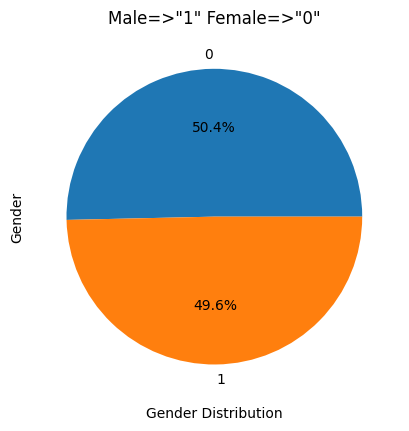

In [10]:
gender = combined_data['Gender'].map({'male': 1, 'female': 0})
gender.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Male=>"1" Female=>"0"')
plt.xlabel('Gender Distribution')
plt.show()

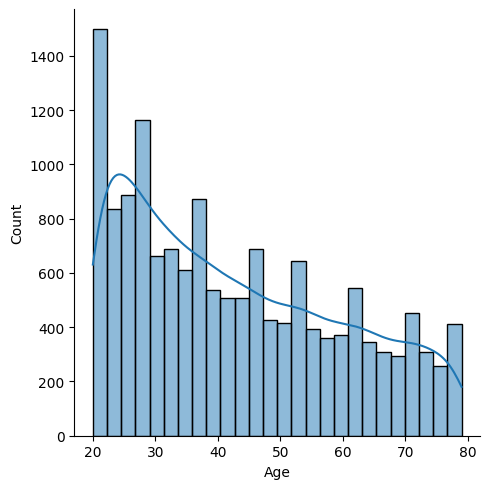

In [11]:
#Age Distribution
sns.displot(combined_data['Age'],kde=True)

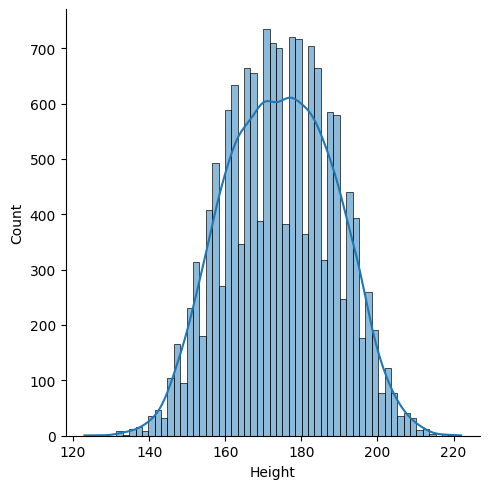

In [12]:
#height distribution in cm
sns.displot(combined_data['Height'],kde=True)

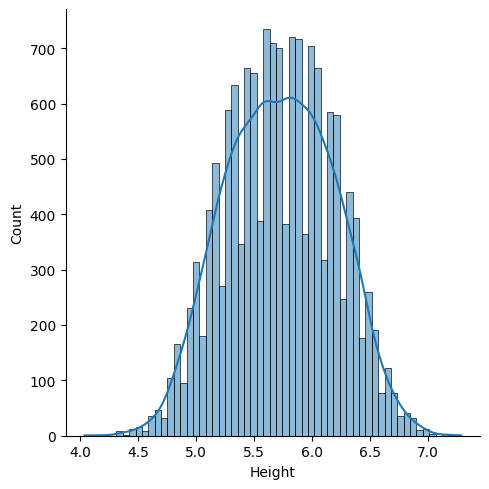

In [13]:
#height distribution converting to feet
height_feet = combined_data['Height']/30.48
sns.displot(height_feet,kde=True)

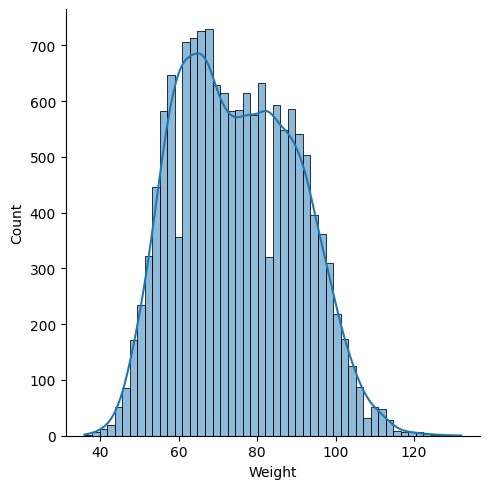

In [14]:
#weight distribution
sns.displot(combined_data['Weight'],kde=True)

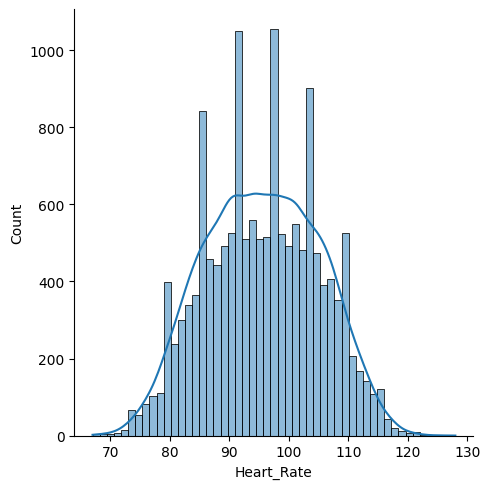

In [15]:
#distribution of Heart Rate
sns.displot(combined_data['Heart_Rate'], kde=True)

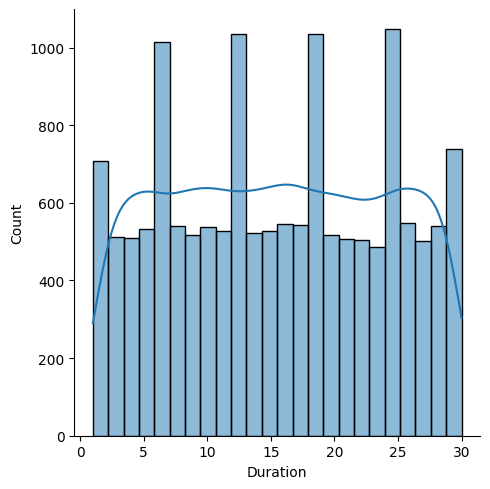

In [16]:
#distribution of Duration of exercise
sns.displot(combined_data["Duration"],kde=True)

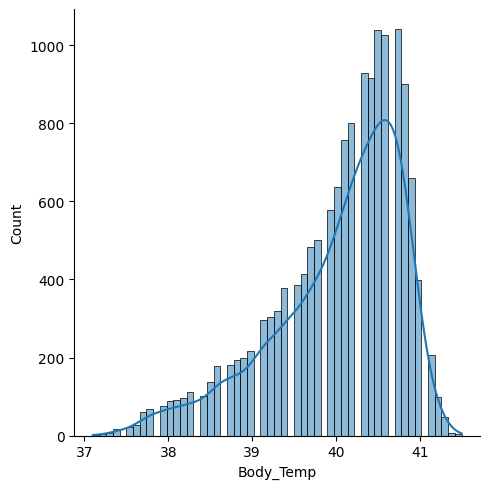

In [17]:
# Body Temp distribution
sns.displot(combined_data['Body_Temp'],kde=True)

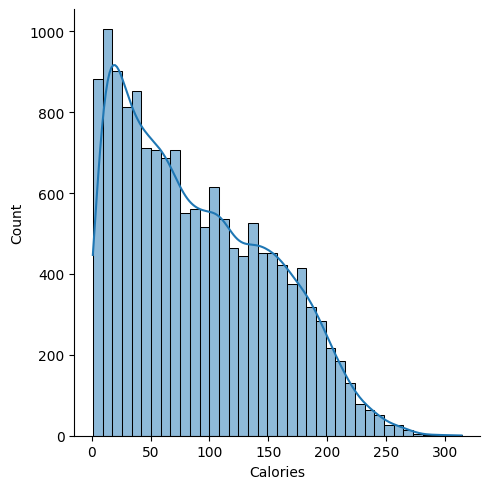

In [18]:
#calories burnt distribution
sns.displot(combined_data['Calories'],kde=True)

### **Correlation**

In [19]:
correlation = combined_data.corr()

<ipython-input-19-a9d0c235935a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = combined_data.corr()


<Axes: >

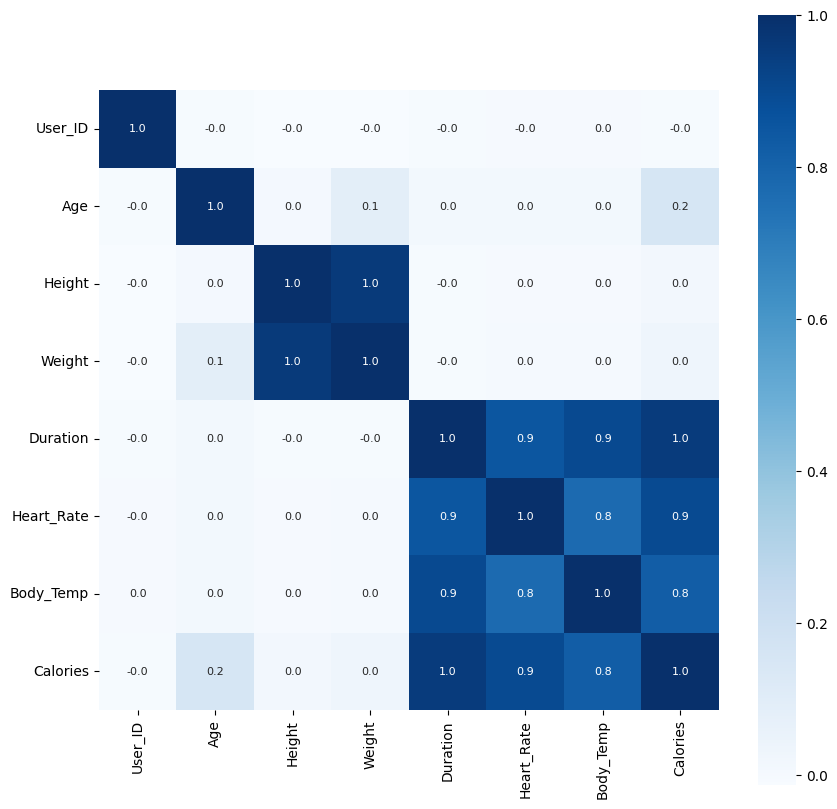

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [21]:
combined_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Seperating Features and Target

In [22]:
X = combined_data.drop(columns=['User_ID','Calories'])
Y = combined_data['Calories']

In [23]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [24]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Training Data and Testing Data

In [25]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=3, test_size=0.2)

In [27]:
print(X.shape,Xtrain.shape,Xtest.shape)
print(Y.shape,Ytrain.shape,Ytest.shape)

(15000, 7) (12000, 7) (3000, 7)
(15000,) (12000,) (3000,)


Training the Model

In [29]:
model = XGBRegressor()

In [30]:
model.fit(Xtrain,Ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Predicting test data Calories

In [31]:
test_data_prediction = model.predict(Xtest)

Mean Absolute Error in Testing Data

In [36]:
mae = metrics.mean_absolute_error(Ytest,test_data_prediction)
print(mae)

1.4833678883314132


In [42]:
overall_calorie_mean=combined_data.loc[:, 'Calories'].mean()
print("Average Calories burned in given data = ",overall_calorie_mean)
error_percent=(mae/overall_calorie_mean)*100
print("Percentage of the error(comparing to average Calories burned in all data) = ",error_percent)

Average Calories burned in given data =  89.53953333333334
Percentage of the error(comparing to average Calories burned in all data) =  1.6566625189001205
